## Function to scrape the Billboards 100 HOT songs

Create a function to scrape the Billboard 100 Hot songs and create a local dataframe of songs with them including:
- Song's name
- Song's artist

*Importing libraries*

from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import difflib
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

*Storing the url in a variable*

In [3]:
url = "https://www.billboard.com/charts/hot-100/"

*Using request package and download the html with a get request*

In [4]:
response = requests.get(url)

*Checking if is everything ok with the data: if the number is 200, it means that is ok*

In [5]:
response.status_code

200

*Creating a "soup" to parse the HTML*

In [6]:
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
soup

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil

In [8]:
soup.select(".a-no-trucate")[0]

<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">

	
	
		
					As It Was		
	
</h3>

In [9]:
soup.select('.c-title.a-no-trucate')

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					As It Was		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					First Class		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Heat Waves		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spaci

In [10]:
soup.select('.c-title.a-no-trucate')[0].get_text().strip()

'As It Was'

In [11]:
song = []
artist = []

In [12]:
num_iter=len(soup.select(".c-label.a-no-trucate"))

In [13]:
for item in range(num_iter):
    artist.append(soup.select('.c-label.a-no-trucate')[item].get_text(strip= True).lower()) ## getting artist name
    song.append(soup.select('.c-title.a-no-trucate')[item].get_text(strip= True).lower()) ## getting song name

In [14]:
song

['as it was',
 'first class',
 'heat waves',
 'big energy',
 'enemy',
 'stay',
 "don't think jesus",
 'woman',
 'super gremlin',
 'ghost',
 'thats what i want',
 'bad habits',
 'abcdefu',
 'shivers',
 'cold heart (pnau remix)',
 'easy on me',
 'need to know',
 'save your tears',
 'one right now',
 'in a minute',
 'levitating',
 "'til you can't",
 'industry baby',
 'mamiii',
 'bam bam',
 'hrs and hrs',
 "we don't talk about bruno",
 'right on',
 'never say never',
 "doin' this",
 'wasted on you',
 'aa',
 'good 4 u',
 'sweetest pie',
 'fingers crossed',
 'i hate u',
 'boyfriend',
 'to the moon!',
 'you right',
 'numb little bug',
 'fancy like',
 'sand in my boots',
 'what happened to virgil',
 'pushin p',
 'beers on me',
 'the motto',
 "she's all i wanna be",
 "when you're gone",
 'buy dirt',
 'about damn time',
 'shake it',
 'light switch',
 'if i was a cowboy',
 'peru',
 'flowers',
 'nail tech',
 'freaky deaky',
 '23',
 'trouble with a heartbreak',
 'broadway girls',
 'heart on fire',


In [15]:
artist

['harry styles',
 'jack harlow',
 'glass animals',
 'latto',
 'imagine dragons x jid',
 'the kid laroi & justin bieber',
 'morgan wallen',
 'doja cat',
 'kodak black',
 'justin bieber',
 'lil nas x',
 'ed sheeran',
 'gayle',
 'ed sheeran',
 'elton john & dua lipa',
 'adele',
 'doja cat',
 'the weeknd & ariana grande',
 'post malone & the weeknd',
 'lil baby',
 'dua lipa',
 'cody johnson',
 'lil nas x & jack harlow',
 'becky g x karol g',
 'camila cabello featuring ed sheeran',
 'muni long',
 'carolina gaitan, mauro castillo, adassa, rhenzy feliz, diane guerrero, stephanie beatriz & encanto cast',
 'lil baby',
 'cole swindell / lainey wilson',
 'luke combs',
 'morgan wallen',
 'walker hayes',
 'olivia rodrigo',
 'megan thee stallion & dua lipa',
 'lauren spencer-smith',
 'sza',
 'dove cameron',
 'jnr choi & sam tompkins',
 'doja cat & the weeknd',
 'em beihold',
 'walker hayes',
 'morgan wallen',
 'lil durk featuring gunna',
 'gunna & future featuring young thug',
 'dierks bentley, brel

In [16]:
dict = {'song' : song, 'artist': artist}

In [17]:
top100 = pd.DataFrame(dict)
top100

,song,artist
0,as it was,harry styles
1,first class,jack harlow
2,heat waves,glass animals
3,big energy,latto
4,enemy,imagine dragons x jid
...,...,...
95,p power,gunna featuring drake
96,money so big,yeat
97,blick blick!,coi leray & nicki minaj
98,fall in love,bailey zimmerman


In [18]:
def selectRandom(song):
    return random.choice(song)

In [19]:
def nome():
    name = input("Enter a name of a song: ")
    if name.lower() in song:
        print("We recomend you the song:", selectRandom(song).capitalize())
    else:
        print("Sorry, the Song is not on Billboard Hot 100!") 

In [20]:
nome()

Enter a name of a song: enemy
We recomend you the song: Give heaven some hell


In [21]:
import config

In [22]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret))

In [23]:
results = sp.search(q="Express yourself",limit=10,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Express+yourself&type=track&market=GB&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4EnEZVjo3w1cwcQYePccay'},
       'href': 'https://api.spotify.com/v1/artists/4EnEZVjo3w1cwcQYePccay',
       'id': '4EnEZVjo3w1cwcQYePccay',
       'name': 'N.W.A.',
       'type': 'artist',
       'uri': 'spotify:artist:4EnEZVjo3w1cwcQYePccay'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0Y7qkJVZ06tS2GUCDptzyW'},
     'href': 'https://api.spotify.com/v1/albums/0Y7qkJVZ06tS2GUCDptzyW',
     'id': '0Y7qkJVZ06tS2GUCDptzyW',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273c79a70e8167cc1a4fab83781',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02c79a70e8167cc1a4fab83781',
       'width': 300},
      {'height': 64,
       'url': 'https:/

In [25]:
track_id=results['tracks']['items'][5]['external_urls']["spotify"][31:]
track_id

'6ioBgySxoeQKALvAeLEmId'

In [84]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"

IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [85]:
import spotipy
import spotipy.util as util

In [86]:
sp.user_playlist_tracks("Willis Orr", "5S8SJdl1BDc0ugpkEvFsIL", market="GB")

{'href': 'https://api.spotify.com/v1/playlists/5S8SJdl1BDc0ugpkEvFsIL/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2017-11-20T02:52:18Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/twgeb7mzdcv4u8h191dxrvlpc'},
    'href': 'https://api.spotify.com/v1/users/twgeb7mzdcv4u8h191dxrvlpc',
    'id': 'twgeb7mzdcv4u8h191dxrvlpc',
    'type': 'user',
    'uri': 'spotify:user:twgeb7mzdcv4u8h191dxrvlpc'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
       'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
       'id': '06HL4z0CvFAxyc27GXpf02',
       'name': 'Taylor Swift',
       'type': 'artist',
       'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6DEjYFkNZh67HP7R9PSZvv'},
     'hre

In [87]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [30]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness",'acousticness',"instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = get_playlist_tracks(creator, playlist_id)
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        try:
            playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
            playlist_features["album"] = track["track"]["album"]["name"]
            playlist_features["track_name"] = track["track"]["name"]
            playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
            audio_features = sp.audio_features(playlist_features["track_id"])[0]
            for feature in playlist_features_list[4:]:
                playlist_features[feature] = audio_features[feature]
        
        except: 
            pass
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [31]:
playlist_df = analyze_playlist("Willis Orr", "5S8SJdl1BDc0ugpkEvFsIL")

In [33]:
playlist_df = playlist_df.dropna() 

In [34]:
playlist_df = playlist_df.drop(['artist', 'album', 'track_name', 'track_id'], axis=1)

In [100]:
scaler = StandardScaler()
scaler.fit(playlist_df)
X_scaled = scaler.transform(playlist_df)
X_scaled_df = pd.DataFrame(X_scaled, columns = playlist_df.columns)
display(playlist_df.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.613,0.764,2,-6.509,1,0.1360,0.0527,0,0.1970,0.417,160.015,208187,4,10
1,0.687,0.845,7,-4.370,1,0.0576,0.1000,0,0.0452,0.809,87.972,190227,4,4
2,0.818,0.803,1,-4.282,1,0.0797,0.0340,0,0.1530,0.632,106.970,225983,4,16
3,0.624,0.876,9,-3.374,1,0.1000,0.0735,0,0.3270,0.781,99.943,170827,4,4
4,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987,4,5


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.271509,0.502404,-0.897797,0.273606,0.724165,0.890071,-0.641689,-0.403607,0.078092,-0.224776,1.392898,-0.203921,0.183508,0.145840
1,0.717251,0.861596,0.495255,0.753371,0.724165,-0.157447,-0.478840,-0.403607,-0.906393,1.350283,-1.153946,-0.252624,0.183508,-0.977165
2,1.506334,0.675349,-1.176408,0.773109,0.724165,0.137835,-0.706071,-0.403607,-0.207266,0.639096,-0.482334,-0.155663,0.183508,1.268845
3,0.337768,0.999065,1.052475,0.976768,0.724165,0.409068,-0.570077,-0.403607,0.921195,1.237779,-0.730750,-0.305231,0.183508,-0.977165
4,0.277533,-1.204867,-0.340577,-0.617065,0.724165,-0.291059,1.266703,-0.401726,-0.560073,-1.092665,-0.446310,-0.066165,0.183508,-0.789998


In [101]:
kmeans = KMeans(n_clusters=20, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=20, random_state=1234)

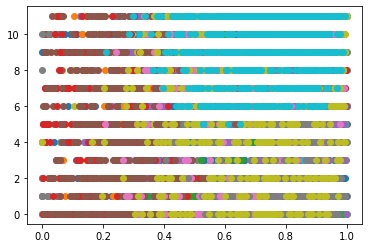

In [102]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(playlist_df.to_numpy()[row_ix, 1], playlist_df.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [103]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      441
1      366
2     1146
3      417
4      609
5      109
6      814
7       84
8      308
9      493
10     853
11      26
12     844
13     276
14     618
15     517
16     379
17     440
18     500
19     719
dtype: int64

In [104]:
#X_df = pd.DataFrame(X)
playlist_df["cluster"] = clusters
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.613,0.764,2,-6.509,1,0.1360,0.05270,0,0.1970,0.417,160.015,208187,4,3
1,0.687,0.845,7,-4.370,1,0.0576,0.10000,0,0.0452,0.809,87.972,190227,4,2
2,0.818,0.803,1,-4.282,1,0.0797,0.03400,0,0.1530,0.632,106.970,225983,4,12
3,0.624,0.876,9,-3.374,1,0.1000,0.07350,0,0.3270,0.781,99.943,170827,4,2
4,0.614,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.403,0.764,9,-8.554,0,0.0451,0.02210,0.17,0.2450,0.196,138.725,666572,4,14
9996,0.406,0.306,3,-10.482,1,0.0372,0.31300,0.0079,0.0727,0.073,135.272,652560,4,15
9997,0.362,0.507,1,-11.229,1,0.0394,0.01740,0.216,0.1130,0.456,146.641,634440,3,1
9998,0.331,0.733,2,-8.671,1,0.0468,0.08870,0.00174,0.9470,0.380,128.512,620747,4,8


In [105]:
kmeans.inertia_

53926.841971915994

In [106]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=300,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

41029.07411914532


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

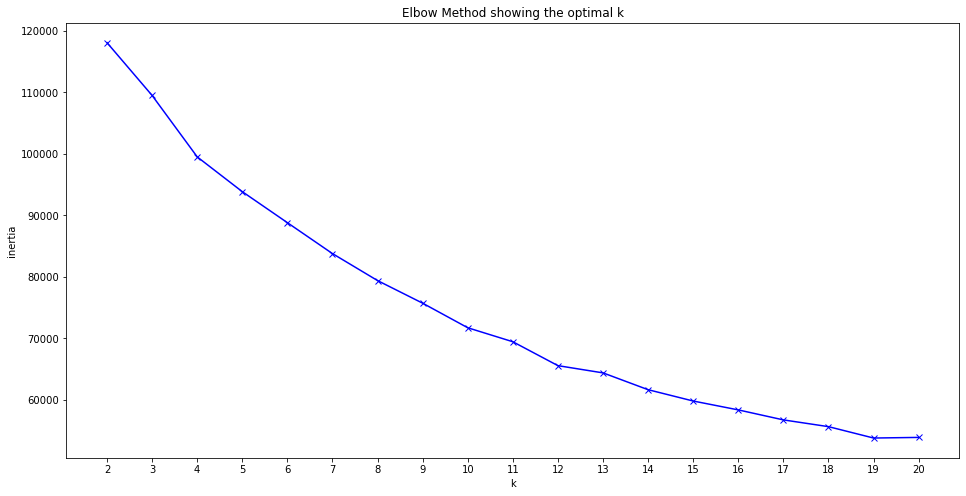

In [107]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

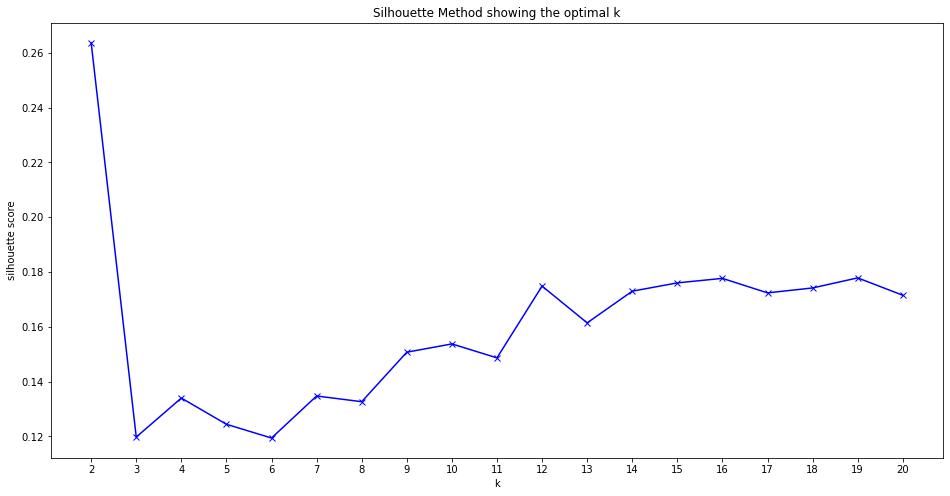

In [108]:
K = range(2, 21)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Spotify Project" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [44]:
def analyze_playlist_again(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id"]
    
    playlist_df_again = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = get_playlist_tracks(creator, playlist_id)
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        try:
            playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
            playlist_features["album"] = track["track"]["album"]["name"]
            playlist_features["track_name"] = track["track"]["name"]
            #playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
            audio_features = sp.audio_features(playlist_features["track_id"])[0]
            for feature in playlist_features_list[4:]:
                playlist_features[feature] = audio_features[feature]
        
        except: 
            pass
        
        # Concat the dfs
        track_df_again = pd.DataFrame(playlist_features, index = [0])
        playlist_df_again = pd.concat([playlist_df_again, track_df_again], ignore_index = True)
        
    return playlist_df_again

In [45]:
new_playlist = analyze_playlist_again("Willis Orr", "5S8SJdl1BDc0ugpkEvFsIL")

In [46]:
new_playlist

,artist,album,track_name,track_id
0,Taylor Swift,reputation,...Ready For It?,NaN
1,Thomas Rhett,Life Changes,Life Changes,NaN
2,Bruno Mars,24K Magic,24K Magic,NaN
3,Ed Sheeran,÷ (Deluxe),Galway Girl,NaN
4,Ed Sheeran,x (Deluxe Edition),Photograph,NaN
...,...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (Remastered),Funeral For A Friend / Love Lies Bleeding - Re...,NaN
9996,Supertramp,Even In The Quietest Moments,Fool's Overture,NaN
9997,Yes,Fragile (Deluxe Edition),Heart of the Sunrise - 2003 Remaster,NaN
9998,Paul McCartney,Wings Over America,Venus And Mars / Rock Show / Jet - Live / Rema...,NaN


In [47]:
playlist_final = new_playlist.join(playlist_df)
playlist_final

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Taylor Swift,reputation,...Ready For It?,NaN,0.613,0.764,2,-6.509,1,0.1360,0.05270,0,0.1970,0.417,160.015,208187,4,10.0
1,Thomas Rhett,Life Changes,Life Changes,NaN,0.687,0.845,7,-4.370,1,0.0576,0.10000,0,0.0452,0.809,87.972,190227,4,4.0
2,Bruno Mars,24K Magic,24K Magic,NaN,0.818,0.803,1,-4.282,1,0.0797,0.03400,0,0.1530,0.632,106.970,225983,4,16.0
3,Ed Sheeran,÷ (Deluxe),Galway Girl,NaN,0.624,0.876,9,-3.374,1,0.1000,0.07350,0,0.3270,0.781,99.943,170827,4,4.0
4,Ed Sheeran,x (Deluxe Edition),Photograph,NaN,0.614,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (Remastered),Funeral For A Friend / Love Lies Bleeding - Re...,NaN,0.403,0.764,9,-8.554,0,0.0451,0.02210,0.17,0.2450,0.196,138.725,666572,4,18.0
9996,Supertramp,Even In The Quietest Moments,Fool's Overture,NaN,0.406,0.306,3,-10.482,1,0.0372,0.31300,0.0079,0.0727,0.073,135.272,652560,4,5.0
9997,Yes,Fragile (Deluxe Edition),Heart of the Sunrise - 2003 Remaster,NaN,0.362,0.507,1,-11.229,1,0.0394,0.01740,0.216,0.1130,0.456,146.641,634440,3,14.0
9998,Paul McCartney,Wings Over America,Venus And Mars / Rock Show / Jet - Live / Rema...,NaN,0.331,0.733,2,-8.671,1,0.0468,0.08870,0.00174,0.9470,0.380,128.512,620747,4,19.0


RECOMENDACAO FINAL

In [109]:
def song_recomendation ():
    name = input("Enter a name of a song: ")
    result =  sp.search (q="name", limit=1, market="GB")
    id_song = result ["tracks"]["items"][0]["id"]
    features_song = sp.audio_features(id_song)
    df_song = pd.DataFrame(features_song)
    df_song.drop(["type", "id", "uri", "track_href", "analysis_url"], axis = 1, inplace = True)
    df_song_scaled = scaler.transform(df_song)
    predict = kmeans.predict(df_song_scaled)
    cluster_number = predict[0].item()
    
        #comparar com outro DF
        
    if name.lower() in song:
        return print("We recomend you the song:", selectRandom(song).capitalize())
    else: 
        x = playlist_final[playlist_final["cluster"]==cluster_number].sample()
        
        return "We recomend you the song: " + x.iloc[0,2] + ' by ' + x.iloc[0,0]

In [110]:
song_recomendation ()

Enter a name of a song: frozen


ValueError: X has 13 features, but StandardScaler is expecting 14 features as input.

In [63]:
playlist_final2= pd.read_csv("Playlist_Final.csv")
playlist_final2

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0,Taylor Swift,reputation,...Ready For It?,2yLa0QULdQr0qAIvVwN6B5,0.613,0.764,2,-6.509,1,0.1360,0.05270,0.000000,0.1970,0.417,160.015,208187,4,13.0
1,1,Thomas Rhett,Life Changes,Life Changes,4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7,-4.370,1,0.0576,0.10000,0.000000,0.0452,0.809,87.972,190227,4,15.0
2,2,Bruno Mars,24K Magic,24K Magic,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1,-4.282,1,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983,4,3.0
3,3,Ed Sheeran,÷ (Deluxe),Galway Girl,0afhq8XCExXpqazXczTSve,0.624,0.876,9,-3.374,1,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827,4,15.0
4,4,Ed Sheeran,x (Deluxe Edition),Photograph,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,6419,deLillos,Neste sommer (Jubileumsutgave) [Remastered],Neste sommer,57ZtwfFbKNS3mj8E8ijujU,0.438,0.757,11,-4.799,1,0.0314,0.00199,0.000000,0.1050,0.340,106.136,236120,4,0.0
6411,6420,ABBA,Voulez-Vous,Voulez-Vous,17OqI90oTFZ3J8PVu6j07V,0.708,0.774,11,-6.931,0,0.0372,0.14900,0.001090,0.1690,0.903,126.636,309173,4,18.0
6412,6421,Bob Seger,Night Moves,Night Moves,6UBjSnyP1O5W5ndJoO9vUk,0.705,0.743,1,-6.631,1,0.0420,0.43200,0.013300,0.1030,0.374,118.552,324423,4,19.0
6413,6422,The Clash,Hits Back,Should I Stay or Should I Go - Remastered,3v8PlUFGQQDBIk1J86waCo,0.742,0.838,2,-6.442,1,0.1100,0.08320,0.000000,0.4180,0.848,113.373,188240,4,3.0


In [81]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import difflib
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from IPython.display import IFrame
import spotipy
import spotipy.util as util

In [91]:
def song_recomendation2 ():
    name = input("Enter a name of a song: ")
    result =  sp.search (q="name", limit=1, market="GB")
    id_song = result ["tracks"]["items"][0]["id"]
    features_song = sp.audio_features(id_song)
    df_song = pd.DataFrame(features_song)
    df_song.drop(["type", "id", "uri", "track_href", "analysis_url"], axis = 1, inplace = True)
    df_song_scaled = scaler.transform(df_song)
    predict = kmeans2.predict(df_song_scaled)
    cluster_number = predict[0].item()
    
        #comparar com outro DF
        
    if name.lower() in song:
        return print("We recomend you the song:", selectRandom(song).capitalize())
    else: 
        x = playlist_final2[playlist_final2["cluster"]==cluster_number].sample()
        track_id = x.iloc[0,3]
        audio = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          )
        
        print ("We recomend you the song: " + x.iloc[0,2] + ' by ' + x.iloc[0,0])
        return audio
    

In [92]:
song_recomendation2 ()

Enter a name of a song: frozen


ValueError: X has 13 features, but StandardScaler is expecting 14 features as input.

tentativas frustradas